In [44]:
# import library
import numpy as np
import csv
import matplotlib.pyplot as plt
from math import pi

import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn import svm
from sklearn.model_selection import cross_val_score
import sys

if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")
import time

In [2]:
#IMPORTANT : import the DataPreprocessing class
from DataPreprocessing import DataPreprocessing

In [3]:
cluster1=pd.read_csv('./clustered_data/cluster_1.csv').sort_values(['Year', 'Month', 'Day'], ascending=[True, True,True])
cluster2=pd.read_csv('./clustered_data/cluster_2.csv').sort_values(['Year', 'Month', 'Day'], ascending=[True, True,True])
cluster3=pd.read_csv('./clustered_data/cluster_3.csv').sort_values(['Year', 'Month', 'Day'], ascending=[True, True,True])
cluster4=pd.read_csv('./clustered_data/cluster_4.csv').sort_values(['Year', 'Month', 'Day'], ascending=[True, True,True])
cluster5=pd.read_csv('./clustered_data/cluster_5.csv').sort_values(['Year', 'Month', 'Day'], ascending=[True, True,True])

In [36]:
cluster1.corr()

,Unnamed: 0,StationIndex,Year,Month,Day,Rainfall
Unnamed: 0,1.000000,4.301901e-02,0.999060,1.600390e-03,1.337617e-04,-0.020069
StationIndex,0.043019,1.000000e+00,0.000000,9.323578e-21,-1.439378e-20,0.001858
Year,0.999060,0.000000e+00,1.000000,0.000000e+00,0.000000e+00,-0.020287
Month,0.001600,9.323578e-21,0.000000,1.000000e+00,0.000000e+00,0.057313
Day,0.000134,-1.439378e-20,0.000000,0.000000e+00,1.000000e+00,-0.005070
Rainfall,-0.020069,1.857501e-03,-0.020287,5.731265e-02,-5.070100e-03,1.000000


In [4]:
#Data preprocessing
DP = DataPreprocessing()

In [5]:
#We will only use the "Rainfall" column
time_series_df1 = cluster1[["Rainfall"]]
time_series_df2 = cluster2[["Rainfall"]]
time_series_df3 = cluster3[["Rainfall"]]
time_series_df4 = cluster4[["Rainfall"]]
time_series_df5 = cluster5[["Rainfall"]]

In [70]:
#We need to specify the column that corresponds to the time series (Rainfall) and the time horizon (40)
X1, y1 = DP.create_dataset_in_time_series_form(entire_dataframe=time_series_df1, time_series_column="Rainfall", time_horizon=5)
X2, y2 = DP.create_dataset_in_time_series_form(entire_dataframe=time_series_df2, time_series_column="Rainfall", time_horizon=5)
X3, y3 = DP.create_dataset_in_time_series_form(entire_dataframe=time_series_df3, time_series_column="Rainfall", time_horizon=5)
X4, y4 = DP.create_dataset_in_time_series_form(entire_dataframe=time_series_df4, time_series_column="Rainfall", time_horizon=5)
X5, y5 = DP.create_dataset_in_time_series_form(entire_dataframe=time_series_df5, time_series_column="Rainfall", time_horizon=5)

# split data in training, validation and  testing data.
90% for training data

20% for testing data

In [71]:
Xtrain1,Xtest1, ytrain1, ytest1 = train_test_split(X1, y1,test_size=0.2 )
Xtrain2,Xtest2, ytrain2, ytest2 = train_test_split(X2, y2,test_size=0.2 )
Xtrain3,Xtest3, ytrain3, ytest3 = train_test_split(X3, y3,test_size=0.2 )
Xtrain4,Xtest4, ytrain4, ytest4 = train_test_split(X4, y4,test_size=0.2 )
Xtrain5,Xtest5, ytrain5, ytest5 = train_test_split(X5, y5,test_size=0.2 )

In [72]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
X_train1,y_train1 = min_max_scaler.fit_transform(Xtrain1), min_max_scaler.fit_transform(ytrain1)
X_test1, y_test1  = min_max_scaler.transform(Xtest1), min_max_scaler.transform(ytest1)

X_train2,y_train2 = min_max_scaler.fit_transform(Xtrain2), min_max_scaler.fit_transform(ytrain2)
X_test2, y_test2  = min_max_scaler.transform(Xtest2), min_max_scaler.transform(ytest2)

X_train3,y_train3 = min_max_scaler.fit_transform(Xtrain3), min_max_scaler.fit_transform(ytrain3)
X_test3, y_test3  = min_max_scaler.transform(Xtest3), min_max_scaler.transform(ytest3)

X_train4,y_train4 = min_max_scaler.fit_transform(Xtrain4), min_max_scaler.fit_transform(ytrain4)
X_test4, y_test4  = min_max_scaler.transform(Xtest4), min_max_scaler.transform(ytest4)


X_train5,y_train5 = min_max_scaler.fit_transform(Xtrain5), min_max_scaler.fit_transform(ytrain5)
X_test5, y_test5  = min_max_scaler.transform(Xtest5), min_max_scaler.transform(ytest5)

In [73]:
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
modelRF = RandomForestRegressor(random_state = 42)
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(modelRF.get_params())

Parameters currently in use:

{'bootstrap': True,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_split': 1e-07,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 10,
 'n_jobs': 1,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


In [74]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 5)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 35, 60, 85, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


# Cluster1: Using Random Search

In [75]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
modelRF = RandomForestRegressor(random_state=42)
# Random search of parameters, using 3 fold cross validation, 
# search across 10 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = modelRF, param_distributions = random_grid, n_iter = 5, cv = 2, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train1,y_train1)

Fitting 2 folds for each of 5 candidates, totalling 10 fits
[CV] max_depth=110, min_samples_split=10, n_estimators=200, max_features=sqrt, min_samples_leaf=2, bootstrap=True 
[CV] max_depth=110, min_samples_split=10, n_estimators=200, max_features=sqrt, min_samples_leaf=2, bootstrap=True 
[CV] max_depth=35, min_samples_split=2, n_estimators=1000, max_features=auto, min_samples_leaf=2, bootstrap=False 
[CV] max_depth=35, min_samples_split=2, n_estimators=1000, max_features=auto, min_samples_leaf=2, bootstrap=False 
[CV] max_depth=10, min_samples_split=10, n_estimators=200, max_features=auto, min_samples_leaf=2, bootstrap=False 
[CV] max_depth=10, min_samples_split=10, n_estimators=200, max_features=auto, min_samples_leaf=2, bootstrap=False 
[CV] max_depth=10, min_samples_split=5, n_estimators=1200, max_features=auto, min_samples_leaf=1, bootstrap=False 
[CV] max_depth=10, min_samples_split=5, n_estimators=1200, max_features=auto, min_samples_leaf=1, bootstrap=False 
[CV]  max_depth=110,

[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:  1.8min remaining:   47.0s


[CV]  max_depth=35, min_samples_split=2, n_estimators=1000, max_features=auto, min_samples_leaf=2, bootstrap=False -  14.2s
[CV]  max_depth=85, min_samples_split=5, n_estimators=1800, max_features=auto, min_samples_leaf=1, bootstrap=False -  20.1s
[CV]  max_depth=85, min_samples_split=5, n_estimators=1800, max_features=auto, min_samples_leaf=1, bootstrap=False -  19.4s


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  2.8min finished


RandomizedSearchCV(cv=2, error_score='raise',
          estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=42,
           verbose=0, warm_start=False),
          fit_params={}, iid=True, n_iter=5, n_jobs=-1,
          param_distributions={'max_depth': [10, 35, 60, 85, 110, None], 'min_samples_split': [2, 5, 10], 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score=True, scoring=None, verbose=2)

In [82]:
rf_random.best_params_

{'bootstrap': True,
 'max_depth': 110,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 10,
 'n_estimators': 200}

Cluster 1 random search
Time =  6.240160942077637
Cluster 1
R^2 score 0.2926467948932222
MSE 11.650560438426988


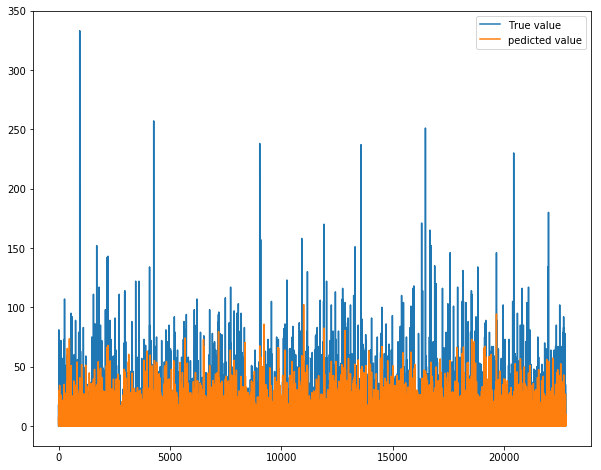

In [109]:
model1 = RandomForestRegressor(bootstrap=True,
                              max_depth= 110,
                              max_features= 'sqrt',
                              min_samples_leaf= 2,
                              min_samples_split= 10,
                              n_estimators= 200)
 

ytest1 =np.array(ytest1)
y_test1 =np.array(y_test1)
t = time.time()
model1.fit(X_train1,y_train1)
print('Cluster 1 random search')
print('==============================')
print('Time = ', time.time()-t)
predict1 = model1.predict(X_test1)
predict1 = predict1 * ytest1.max()
m1 = np.sqrt(metrics.mean_squared_error(ytest1, predict1))
print('Cluster 1')
print('==============================')
print('R^2 score' ,metrics.r2_score(ytest1, predict1))
print('=================================')
print('MSE', np.sqrt(metrics.mean_squared_error(ytest1, predict1)))
print('===================================')
plt.figure(figsize=(10,8))
plt.plot(ytest1)
plt.plot(predict1)
plt.legend(['True value', 'pedicted value'])
plt.savefig('randomFCl1.svg', dpi=3000)
plt.show()
#X.shape, y.shape, X1.shape, y1.shape

# Cluster 2: Random search

In [78]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
modelRF = RandomForestRegressor(random_state=42)
# Random search of parameters, using 3 fold cross validation, 
# search across 10 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = modelRF, param_distributions = random_grid, n_iter = 5, cv = 2, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train2,y_train2)

Fitting 2 folds for each of 5 candidates, totalling 10 fits
[CV] max_depth=110, min_samples_split=10, n_estimators=200, max_features=sqrt, min_samples_leaf=2, bootstrap=True 
[CV] max_depth=110, min_samples_split=10, n_estimators=200, max_features=sqrt, min_samples_leaf=2, bootstrap=True 
[CV] max_depth=35, min_samples_split=2, n_estimators=1000, max_features=auto, min_samples_leaf=2, bootstrap=False 
[CV] max_depth=35, min_samples_split=2, n_estimators=1000, max_features=auto, min_samples_leaf=2, bootstrap=False 
[CV] max_depth=10, min_samples_split=10, n_estimators=200, max_features=auto, min_samples_leaf=2, bootstrap=False 
[CV] max_depth=10, min_samples_split=5, n_estimators=1200, max_features=auto, min_samples_leaf=1, bootstrap=False 
[CV] max_depth=10, min_samples_split=5, n_estimators=1200, max_features=auto, min_samples_leaf=1, bootstrap=False 
[CV] max_depth=10, min_samples_split=10, n_estimators=200, max_features=auto, min_samples_leaf=2, bootstrap=False 
[CV]  max_depth=110,

[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    8.3s remaining:    3.5s


[CV]  max_depth=35, min_samples_split=2, n_estimators=1000, max_features=auto, min_samples_leaf=2, bootstrap=False -   1.0s
[CV]  max_depth=85, min_samples_split=5, n_estimators=1800, max_features=auto, min_samples_leaf=1, bootstrap=False -   1.3s
[CV]  max_depth=85, min_samples_split=5, n_estimators=1800, max_features=auto, min_samples_leaf=1, bootstrap=False -   1.2s


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   13.9s finished


RandomizedSearchCV(cv=2, error_score='raise',
          estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=42,
           verbose=0, warm_start=False),
          fit_params={}, iid=True, n_iter=5, n_jobs=-1,
          param_distributions={'max_depth': [10, 35, 60, 85, 110, None], 'min_samples_split': [2, 5, 10], 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score=True, scoring=None, verbose=2)

In [84]:
rf_random.best_params_

{'bootstrap': True,
 'max_depth': 110,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 10,
 'n_estimators': 200}

Cluster 2
R^2 score 0.12790481635300321
MSE 21.575652679553194


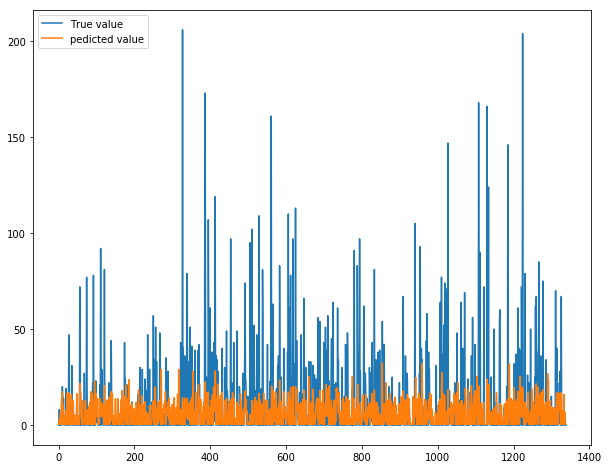

In [108]:
model2 = RandomForestRegressor(bootstrap=True,
                              max_depth= 110,
                              max_features= 'sqrt',
                              min_samples_leaf= 2,
                              min_samples_split= 10,
                              n_estimators= 200)
y_test2 =np.array(y_test2)
ytest2 =np.array(ytest2)
model2.fit(X_train2,y_train2)
predict2 = model2.predict(X_test2)
predict2 = predict2 * ytest2.max()
m2 = np.sqrt(metrics.mean_squared_error(ytest2, predict2))
print('Cluster 2')
print('==============================')
print('R^2 score' ,metrics.r2_score(ytest2, predict2))
print('=================================')
print('MSE', np.sqrt(metrics.mean_squared_error(ytest2, predict2)))
print('===================================')

plt.figure(figsize=(10,8))
plt.plot(ytest2)
plt.plot(predict2)
plt.legend(['True value', 'pedicted value'])
plt.savefig('randomFCl2.svg', dpi=3000)
plt.show()

# cluster 3: Random Search

In [79]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
modelRF = RandomForestRegressor(random_state=42)
# Random search of parameters, using 3 fold cross validation, 
# search across 10 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = modelRF, param_distributions = random_grid, n_iter = 5, cv = 2, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train3,y_train3)

Fitting 2 folds for each of 5 candidates, totalling 10 fits
[CV] max_depth=110, min_samples_split=10, n_estimators=200, max_features=sqrt, min_samples_leaf=2, bootstrap=True 
[CV] max_depth=110, min_samples_split=10, n_estimators=200, max_features=sqrt, min_samples_leaf=2, bootstrap=True 
[CV] max_depth=35, min_samples_split=2, n_estimators=1000, max_features=auto, min_samples_leaf=2, bootstrap=False 
[CV] max_depth=35, min_samples_split=2, n_estimators=1000, max_features=auto, min_samples_leaf=2, bootstrap=False 
[CV] max_depth=10, min_samples_split=10, n_estimators=200, max_features=auto, min_samples_leaf=2, bootstrap=False 
[CV] max_depth=10, min_samples_split=10, n_estimators=200, max_features=auto, min_samples_leaf=2, bootstrap=False 
[CV] max_depth=10, min_samples_split=5, n_estimators=1200, max_features=auto, min_samples_leaf=1, bootstrap=False 
[CV] max_depth=10, min_samples_split=5, n_estimators=1200, max_features=auto, min_samples_leaf=1, bootstrap=False 
[CV]  max_depth=110,

[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:  1.1min remaining:   27.5s


[CV]  max_depth=35, min_samples_split=2, n_estimators=1000, max_features=auto, min_samples_leaf=2, bootstrap=False -   9.3s
[CV]  max_depth=85, min_samples_split=5, n_estimators=1800, max_features=auto, min_samples_leaf=1, bootstrap=False -  10.5s
[CV]  max_depth=85, min_samples_split=5, n_estimators=1800, max_features=auto, min_samples_leaf=1, bootstrap=False -  10.5s


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  1.7min finished


RandomizedSearchCV(cv=2, error_score='raise',
          estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=42,
           verbose=0, warm_start=False),
          fit_params={}, iid=True, n_iter=5, n_jobs=-1,
          param_distributions={'max_depth': [10, 35, 60, 85, 110, None], 'min_samples_split': [2, 5, 10], 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score=True, scoring=None, verbose=2)

In [87]:
rf_random.best_params_

{'bootstrap': True,
 'max_depth': 110,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 10,
 'n_estimators': 200}

Cluster 3
R^2 score 0.28904324640817325
MSE 16.840362092663778


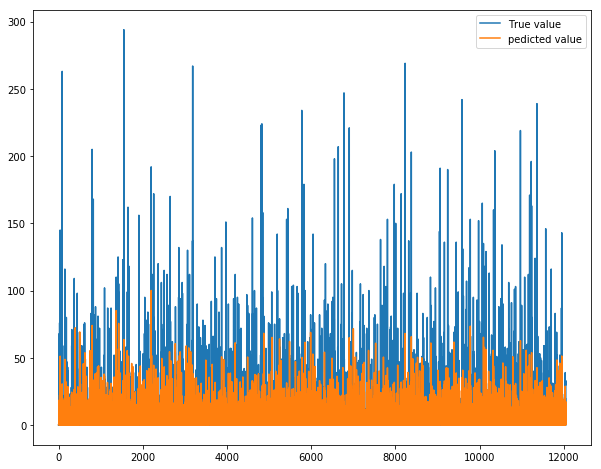

In [107]:
model3 = RandomForestRegressor(bootstrap=True,
                              max_depth= 110,
                              max_features= 'sqrt',
                              min_samples_leaf= 2,
                              min_samples_split= 10,
                              n_estimators= 200)
ytest3 =np.array(ytest3)
y_test3 =np.array(y_test3)
model3.fit(X_train3,y_train3)
predict3 = model3.predict(X_test3)
predict3 = predict3 * ytest3.max()
m3 = np.sqrt(metrics.mean_squared_error(ytest3, predict3))
print('Cluster 3')
print('==============================')
print('R^2 score' ,metrics.r2_score(ytest3, predict3))
print('================================')
print('MSE', np.sqrt(metrics.mean_squared_error(ytest3, predict3)))
print('=================================')
plt.figure(figsize=(10,8))
plt.plot(ytest3)
plt.plot(predict3)
plt.legend(['True value', 'pedicted value'])
plt.savefig('randomFCl3.svg', dpi=2000)
plt.show()

# Cluster 4 : Using random search

In [80]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
modelRF = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 10 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = modelRF, param_distributions = random_grid, n_iter = 5, cv = 2, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train4,y_train4)

Fitting 2 folds for each of 5 candidates, totalling 10 fits
[CV] max_depth=110, min_samples_split=10, n_estimators=200, max_features=sqrt, min_samples_leaf=2, bootstrap=True 
[CV] max_depth=110, min_samples_split=10, n_estimators=200, max_features=sqrt, min_samples_leaf=2, bootstrap=True 
[CV] max_depth=35, min_samples_split=2, n_estimators=1000, max_features=auto, min_samples_leaf=2, bootstrap=False 
[CV] max_depth=35, min_samples_split=2, n_estimators=1000, max_features=auto, min_samples_leaf=2, bootstrap=False 
[CV] max_depth=10, min_samples_split=10, n_estimators=200, max_features=auto, min_samples_leaf=2, bootstrap=False 
[CV] max_depth=10, min_samples_split=5, n_estimators=1200, max_features=auto, min_samples_leaf=1, bootstrap=False 
[CV] max_depth=10, min_samples_split=10, n_estimators=200, max_features=auto, min_samples_leaf=2, bootstrap=False 
[CV] max_depth=10, min_samples_split=5, n_estimators=1200, max_features=auto, min_samples_leaf=1, bootstrap=False 
[CV]  max_depth=110,

[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:   23.4s remaining:   10.0s


[CV]  max_depth=35, min_samples_split=2, n_estimators=1000, max_features=auto, min_samples_leaf=2, bootstrap=False -   3.4s
[CV]  max_depth=85, min_samples_split=5, n_estimators=1800, max_features=auto, min_samples_leaf=1, bootstrap=False -   3.6s
[CV]  max_depth=85, min_samples_split=5, n_estimators=1800, max_features=auto, min_samples_leaf=1, bootstrap=False -   3.8s


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   32.7s finished


RandomizedSearchCV(cv=2, error_score='raise',
          estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False),
          fit_params={}, iid=True, n_iter=5, n_jobs=-1,
          param_distributions={'max_depth': [10, 35, 60, 85, 110, None], 'min_samples_split': [2, 5, 10], 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score=True, scoring=None, verbose=2)

In [89]:
rf_random.best_params_

{'bootstrap': True,
 'max_depth': 110,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 10,
 'n_estimators': 200}

Cluster 4
R^2 score 0.32305441546585845
MSE 23.800401188523725


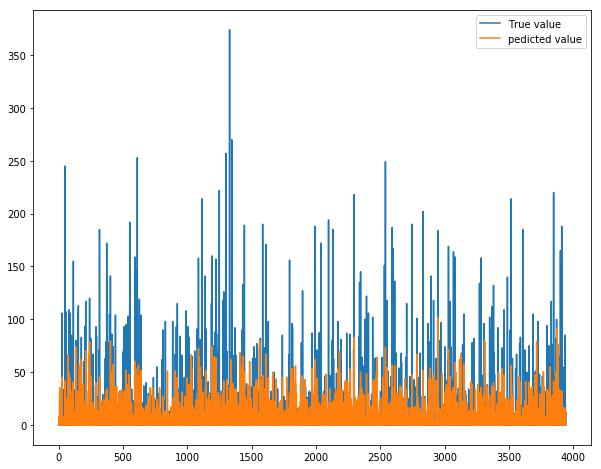

In [106]:
model4 = RandomForestRegressor(bootstrap=True,
                              max_depth= 110,
                              max_features= 'sqrt',
                              min_samples_leaf= 2,
                              min_samples_split= 10,
                              n_estimators= 200)
ytest4 =np.array(ytest4)
y_test4 =np.array(y_test4)
model4.fit(X_train4,y_train4)
predict4 = model4.predict(X_test4)
predict4 = predict4 * ytest4.max()
m4 = np.sqrt(metrics.mean_squared_error(ytest4, predict4))
print('Cluster 4')
print('==============================')
print('R^2 score' ,metrics.r2_score(ytest4, predict4))
print('================================')
print('MSE', np.sqrt(metrics.mean_squared_error(ytest4, predict4)))
print('=================================')
plt.figure(figsize=(10,8))
plt.plot(ytest4)
plt.plot(predict4)
plt.legend(['True value', 'pedicted value'])
plt.savefig('randomFCl4.svg', dpi=3000)
plt.show()

In [91]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
modelRF = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 10 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = modelRF, param_distributions = random_grid, n_iter = 5, cv = 2, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train5,y_train5)

Fitting 2 folds for each of 5 candidates, totalling 10 fits
[CV] max_depth=110, min_samples_split=10, n_estimators=200, max_features=sqrt, min_samples_leaf=2, bootstrap=True 
[CV] max_depth=110, min_samples_split=10, n_estimators=200, max_features=sqrt, min_samples_leaf=2, bootstrap=True 
[CV] max_depth=35, min_samples_split=2, n_estimators=1000, max_features=auto, min_samples_leaf=2, bootstrap=False 
[CV] max_depth=35, min_samples_split=2, n_estimators=1000, max_features=auto, min_samples_leaf=2, bootstrap=False 
[CV] max_depth=10, min_samples_split=10, n_estimators=200, max_features=auto, min_samples_leaf=2, bootstrap=False 
[CV] max_depth=10, min_samples_split=10, n_estimators=200, max_features=auto, min_samples_leaf=2, bootstrap=False 
[CV] max_depth=10, min_samples_split=5, n_estimators=1200, max_features=auto, min_samples_leaf=1, bootstrap=False 
[CV] max_depth=10, min_samples_split=5, n_estimators=1200, max_features=auto, min_samples_leaf=1, bootstrap=False 
[CV]  max_depth=110,

[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:   31.9s remaining:   13.7s


[CV]  max_depth=35, min_samples_split=2, n_estimators=1000, max_features=auto, min_samples_leaf=2, bootstrap=False -   4.2s
[CV]  max_depth=85, min_samples_split=5, n_estimators=1800, max_features=auto, min_samples_leaf=1, bootstrap=False -   6.5s
[CV]  max_depth=85, min_samples_split=5, n_estimators=1800, max_features=auto, min_samples_leaf=1, bootstrap=False -   6.3s


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   55.4s finished


RandomizedSearchCV(cv=2, error_score='raise',
          estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False),
          fit_params={}, iid=True, n_iter=5, n_jobs=-1,
          param_distributions={'max_depth': [10, 35, 60, 85, 110, None], 'min_samples_split': [2, 5, 10], 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score=True, scoring=None, verbose=2)

In [92]:
rf_random.best_params_

{'bootstrap': True,
 'max_depth': 110,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 10,
 'n_estimators': 200}

Cluster 5
R^2 score 0.3773827910657612
MSE 19.297963824770193


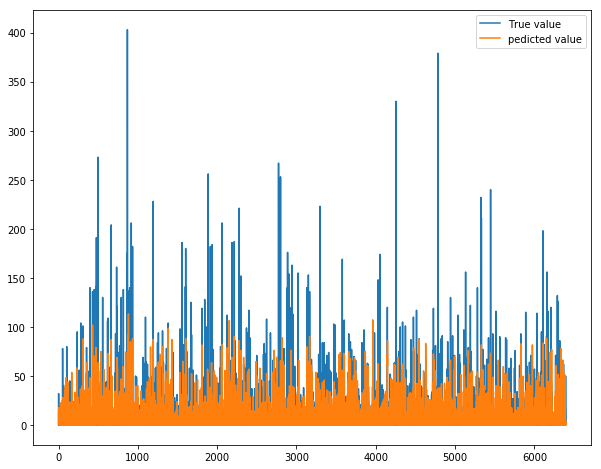

In [105]:
model5 = RandomForestRegressor(bootstrap=True,
                              max_depth= 110,
                              max_features= 'sqrt',
                              min_samples_leaf= 2,
                              min_samples_split= 10,
                              n_estimators= 200)
ytest5 =np.array(ytest5)
y_test5 =np.array(y_test5)
model5.fit(X_train5,y_train5)
predict5 = model5.predict(X_test5)
predict5 = predict5 * ytest5.max()
m5 = np.sqrt(metrics.mean_squared_error(ytest5, predict5))
print('Cluster 5')
print('==============================')
print('R^2 score' ,metrics.r2_score(ytest5, predict5))
print('================================')
print('MSE', np.sqrt(metrics.mean_squared_error(ytest5, predict5)))
print('=================================')
plt.figure(figsize=(10,8))
plt.plot(ytest5)
plt.plot(predict5)
plt.legend(['True value', 'pedicted value'])
plt.savefig('randomFCl5.svg', dpi=3000)
plt.show()

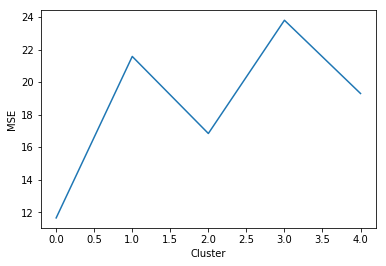

In [112]:
mse = np.array([m1,m2,m3,m4,m5])
plt.plot(mse)
plt.xlabel('Cluster')
plt.ylabel('MSE')
plt.show()